In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Loading the data
Dataset=pd.read_csv("E:\\Gladys\\DataSets\\Position_Salaries.csv")

In [3]:
# First five rows
Dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
# Number of rows and columns
Dataset.shape

(10, 3)

In [5]:
# Overall information
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [6]:
# Checking for null values
Dataset.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

In [7]:
# Statistically describing the data
Dataset.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [8]:
# Dropping the column Position
Dataset=Dataset.drop(['Position'],axis=1)

In [9]:
Dataset.head()

,Level,Salary
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000


In [10]:
# Independent and Dependent variables
X = Dataset.iloc[:,-2].values
y = Dataset.iloc[:,-1].values

In [11]:
X

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [12]:
X = X.reshape(len(X),1)
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [13]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [14]:
y = y.reshape(len(y),1)
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

In [15]:
# Standardizing the data
from sklearn.preprocessing import StandardScaler
SS_X = StandardScaler()
SS_y = StandardScaler()
X = SS_X.fit_transform(X)
y = SS_y.fit_transform(y)
X


array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [16]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

In [17]:
import warnings
warnings.filterwarnings("ignore")

In [18]:
# Fitting the model
from sklearn.svm import SVR
Regressor = SVR(kernel = 'rbf')
Regressor.fit(X,y)

SVR()

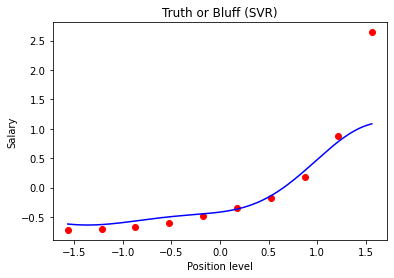

In [19]:
# Visualizing SVR
X_grid = np.arange(min(X), max(X), 0.01) #this step required because data is feature scaled.
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, Regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()